# Doctor Consultation Fee Problem

In [2]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
# read the excel files

data= pd.read_excel(r"C:\Users\Ash\Desktop\Data Trained\Projects\Projects 11_12_13_14_15_16\Doctor Fees/Doctor fees Final_Train.xlsx")


In [5]:
# check the first five sample data 

data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [6]:
# check the shapes of both the dataset

print(data.shape)
#print(data_test.shape)

(5961, 7)


In [7]:
#check the info of the data dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
Qualification         5961 non-null object
Experience            5961 non-null object
Rating                2659 non-null object
Place                 5936 non-null object
Profile               5961 non-null object
Miscellaneous_Info    3341 non-null object
Fees                  5961 non-null int64
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [8]:
# checking the null values

data.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

#### Treatment of the Missing Values

In [9]:
# Since the feature rating has more than half of the records, dropping the records is not a good solution. So, we will fill 
# it 0% values

data.Rating.fillna(0,inplace=True)

In [10]:
# Since few records are missing in Place feature, we can drop these records

data.dropna(subset=['Place'],inplace=True)

In [11]:
data.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

In [12]:
# Since miscelleneous feature contains the data which look not so important for the modelling, so we will drop this column

data= data.drop(labels=['Miscellaneous_Info'],axis=1)

#### Feature Preprocessing and Feature Engineering

In [13]:
# Lets convert the feature Rating from % to numerical values

data.Rating.replace("%","",inplace=True,regex=True)
data['Rating']=data['Rating'].astype(int)

In [18]:
data.head()

,Qualification,Experience,Rating,Place,Profile,Fees,Qualification_1
0,"BHMS, MD - Homeopathy",24,100,"Kakkanad, Ernakulam",Homeopath,100,BHMS
1,"BAMS, MD - Ayurveda Medicine",12,98,"Whitefield, Bangalore",Ayurveda,350,BAMS
2,"MBBS, MS - Otorhinolaryngology",9,0,"Mathikere - BEL, Bangalore",ENT Specialist,300,MBBS
3,"BSc - Zoology, BAMS",12,0,"Bannerghatta Road, Bangalore",Ayurveda,250,BSc
4,BAMS,20,100,"Keelkattalai, Chennai",Ayurveda,250,BAMS


In [15]:
# Lets convert the feature Experience from string to numerical values

data['Experience']=(data.Experience.str.split().str[0]).astype(int)

In [17]:
# Now, lets split the feature Qualification into more features using split function

a = data.Qualification.str.split(',')

data['Qualification_1']= a.str[0]
data['Qualification_1']=data.Qualification_1.str.split('-').str[0]

In [19]:
data['Qualification_2']= a.str[1]

data['Qualification_2']=data.Qualification_2.str.split('-').str[0]
data['Qualification_2'].fillna("0",inplace=True)

In [20]:
# Since the null values are more in this we can ignore to create a feature for this

a.str[2].isnull().sum()

4565

In [21]:
data.head()

,Qualification,Experience,Rating,Place,Profile,Fees,Qualification_1,Qualification_2
0,"BHMS, MD - Homeopathy",24,100,"Kakkanad, Ernakulam",Homeopath,100,BHMS,MD
1,"BAMS, MD - Ayurveda Medicine",12,98,"Whitefield, Bangalore",Ayurveda,350,BAMS,MD
2,"MBBS, MS - Otorhinolaryngology",9,0,"Mathikere - BEL, Bangalore",ENT Specialist,300,MBBS,MS
3,"BSc - Zoology, BAMS",12,0,"Bannerghatta Road, Bangalore",Ayurveda,250,BSc,BAMS
4,BAMS,20,100,"Keelkattalai, Chennai",Ayurveda,250,BAMS,0


In [22]:
# Now, lets split the feature Place into more features using split function

a = data['Place'].str.split(',')
data['Area'] = a.str[0]
data['City'] = a.str[1].fillna("0")

In [23]:
# Now, lets drop the unnecessary features 

data = data.drop(labels=['Qualification','Place'],axis=1)

In [24]:
data.head()

,Experience,Rating,Profile,Fees,Qualification_1,Qualification_2,Area,City
0,24,100,Homeopath,100,BHMS,MD,Kakkanad,Ernakulam
1,12,98,Ayurveda,350,BAMS,MD,Whitefield,Bangalore
2,9,0,ENT Specialist,300,MBBS,MS,Mathikere - BEL,Bangalore
3,12,0,Ayurveda,250,BSc,BAMS,Bannerghatta Road,Bangalore
4,20,100,Ayurveda,250,BAMS,0,Keelkattalai,Chennai


###  EDA 

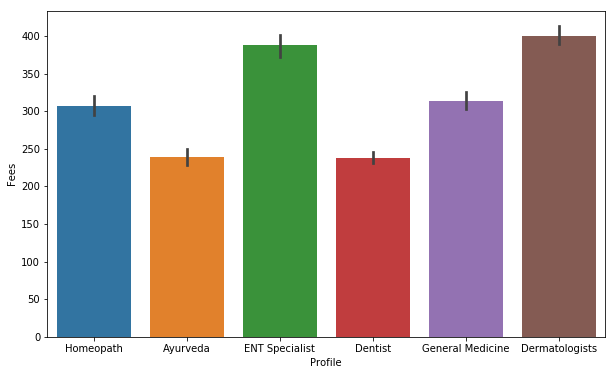

In [25]:
# Bivariate Analysis

plt.figure(figsize=(10,6))
sns.barplot(y='Fees',x='Profile',data=data)

###### We can oberve that the ENT specialist and Dermatologist are having the highest fees. 

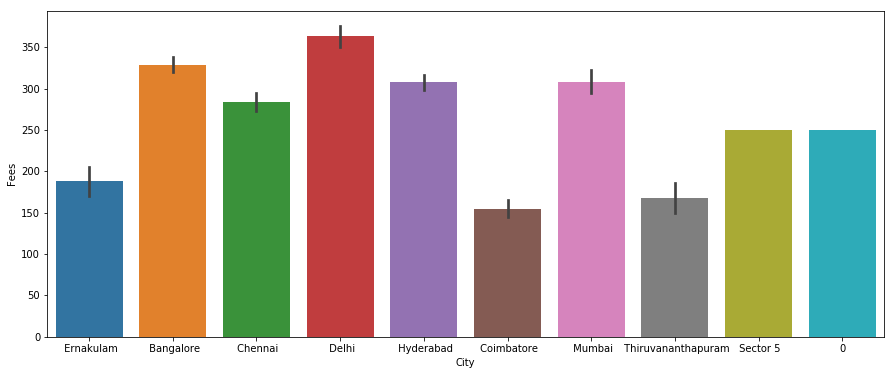

In [26]:
plt.figure(figsize=(15,6))
sns.barplot(y='Fees',x='City',data=data)

##### We can oberve that the doctors who are practicing in Delhi, Bangalore,Hyderabad and Mumbai are having the highest fees.

In [27]:
# Lets convert the categorical into numerical variables

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Profile'] = le.fit_transform(data['Profile'])
data['Qualification_1'] = le.fit_transform(data['Qualification_1'])
data['Qualification_2'] = le.fit_transform(data['Qualification_2'])
data['Area'] = le.fit_transform(data['Area'])
data['City'] = le.fit_transform(data['City'])

In [28]:
data.head()

,Experience,Rating,Profile,Fees,Qualification_1,Qualification_2,Area,City
0,24,100,5,100,8,207,296,4
1,12,98,0,350,5,207,855,0
2,9,0,3,300,68,224,452,0
3,12,0,0,250,12,7,68,0
4,20,100,0,250,5,301,335,1


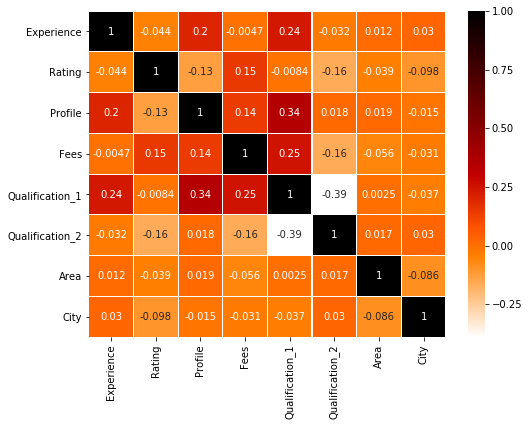

In [29]:
#check the correlation

plt.figure(figsize=(8,6))
sns.heatmap(data.corr(),cmap='gist_heat_r',linewidths=0.1,linecolor='w',annot=True)

##### By the heat map, we can oberve that the feature Qaulification has a high impact on the fees of the doctor

In [30]:
# Segregate the target and features

y = data['Fees']
X = data.drop(labels=['Fees'],axis=1)

X.shape

(5936, 7)

In [31]:
# Scaling the features

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

X = pd.DataFrame(X_scaled,columns=X.columns)

In [32]:
# Segregate the data set into train and test set

from sklearn.model_selection import train_test_split

train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=0.3,random_state=42)

## Linear Regression

In [33]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_X,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [34]:
lr_predicted = lr.predict(test_X)

In [35]:
lr_score = mean_squared_error(test_y,lr_predicted)

In [36]:
print ('Linear Model :')
print ('Mean Squared Error: %.2f' %(lr_score))
print ('Root Mean Squared Error: %.2f' %((np.sqrt(lr_score))))

Linear Model :
Mean Squared Error: 31898.19
Root Mean Squared Error: 178.60


## Implementing the XG Boosting on the train set

In [37]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [38]:
import xgboost as xgb

In [39]:
xgb_reg = xgb.XGBRegressor(max_depth=7,learning_rate=0.1,n_estimators=100,objective='reg:linear',
                           colsample_bytree=0.3,reg_alpha=10)

In [40]:
xgb_reg.fit(train_X,train_y)

[14:57:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.3, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=10, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [41]:
xgb_predicted = xgb_reg.predict(test_X)

In [42]:
xgb_score = mean_squared_error(test_y,xgb_predicted)

In [43]:
print ('XG Boosting Regression Model :')
print ('Mean Squared Error: %.2f' %(xgb_score))
print ('Root Mean Squared Error: %.2f' %((np.sqrt(xgb_score))))

XG Boosting Regression Model :
Mean Squared Error: 28009.77
Root Mean Squared Error: 167.36


## XG Boost Algorithm to predict the fees for test set

In [45]:
data_test = pd.read_excel(r"C:\Users\Ash\Desktop\Data Trained\Projects\Projects 11_12_13_14_15_16\Doctor Fees/Doctor fees Final_Test.xlsx")

In [46]:
data_test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai",NaN
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...,NaN


In [47]:
# checking the null values

data_test.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
Fees                  1987
dtype: int64

In [48]:
# Since the feature rating has more than half of the records, dropping the records is not a good solution. So, we will fill 
# it 0% values

data_test.Rating.fillna(0,inplace=True)

# Since few records are missing in Place feature, we can drop these records

data_test.dropna(subset=['Place'],inplace=True)

# Since miscelleneous feature contains the data_test which look not so important for the modelling, so we will drop this column

data_test= data_test.drop(labels=['Miscellaneous_Info'],axis=1)

# Lets convert the feature Rating from % to numerical values

data_test.Rating.replace("%","",inplace=True,regex=True)
data_test['Rating']=data_test['Rating'].astype(int)

# Lets convert the feature Experience from string to numerical values

data_test['Experience']=(data_test.Experience.str.split().str[0]).astype(int)

# Now, lets split the feature Qualification into more features using split function

a = data_test.Qualification.str.split(',').str[0]

data_test['Qualification_1']= a.str[0]
data_test['Qualification_1']=data_test.Qualification_1.str.split('-').str[0]

data_test['Qualification_2']= a.str[1]

data_test['Qualification_2']=data_test.Qualification_2.str.split('-').str[0]
data_test['Qualification_2'].fillna("0",inplace=True)

# Now, lets split the feature Place into more features using split function

a = data_test['Place'].str.split(',')
data_test['Area'] = a.str[0]
data_test['City'] = a.str[1].fillna("0")

# Now, lets drop the unnecessary features 

data_test = data_test.drop(labels=['Qualification','Place'],axis=1)

# Lets convert the categorical into numerical variables

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data_test['Profile'] = le.fit_transform(data_test['Profile'])
data_test['Qualification_1'] = le.fit_transform(data_test['Qualification_1'])
data_test['Qualification_2'] = le.fit_transform(data_test['Qualification_2'])
data_test['Area'] = le.fit_transform(data_test['Area'])
data_test['City'] = le.fit_transform(data_test['City'])

# Segregate the target and features

y = data_test['Fees']
X = data_test.drop(labels=['Fees'],axis=1)

# Scaling the features

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

X = pd.DataFrame(X_scaled,columns=X.columns)

In [49]:
X.shape

(1981, 7)

In [56]:
# Predicting the fees for the data_test using XGB Regressor

xgb_predicted_test = xgb_reg.predict(X)
xgb_predicted_test

array([403.00943, 448.8644 , 337.62897, ..., 374.34668, 280.07855,
       405.1018 ], dtype=float32)

In [57]:
X['Fees']=pd.DataFrame(xgb_predicted_test)

In [60]:
X.to_excel(r"C:\Users\Ash\Desktop\Data Trained\Projects\Projects 11_12_13_14_15_16\Doctor Fees/myDoctorFeesPrediction.xlsx")